In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_moons

In [9]:
X, y  = make_moons(100, noise=0.1)

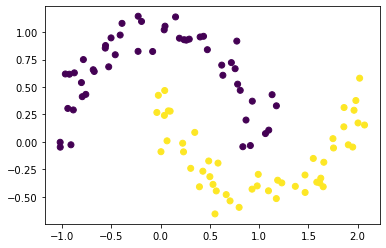

In [10]:
plt.scatter(*X.T, c=y)

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [16]:
tree = DecisionTreeClassifier()
tree.fit(X, y)

DecisionTreeClassifier()

In [29]:
svm = SVC(kernel="linear")
svm.fit(X, y)

SVC(kernel='linear')

In [22]:
from matplotlib.colors import ListedColormap


def plot_classf_model(X, y, model, ax, title=None, step=0.01, epsilon=0.1, contour=False):
    """
    Contourplot a two-class underlying model, and test datapoints.
    
    Paramters
    ---------
    X: Matrix(mxn, R)
        Matrix of feature vectors with examples
    y: n-dimensional vector 
        Actual classes for each of the "m" provided examples.
    """
    custom_cmap = ListedColormap(["#fafab0","#9898ff","#a0faa0"])
    points_cmap = ListedColormap(["Yellow", "Blue"])
    x0, x1 = X[:,0].min() - epsilon, X[:,0].max() + epsilon
    y0, y1 = X[:,1].min() - epsilon, X[:,1].max() + epsilon
    
    xx, yy = np.mgrid[x0:x1:step, y0:y1:step]
    
    preds = model.predict(np.c_[xx.ravel(), yy.ravel()])
    preds = preds.reshape(xx.shape)
    
    if contour:
        ax.contour(xx, yy, preds)
    ax.pcolormesh(xx, yy, preds, cmap=custom_cmap)
    ax.scatter(*X.T, c=y, s=50, edgecolor="k", cmap=points_cmap)
    if title is not None:
        ax.set_title(title)

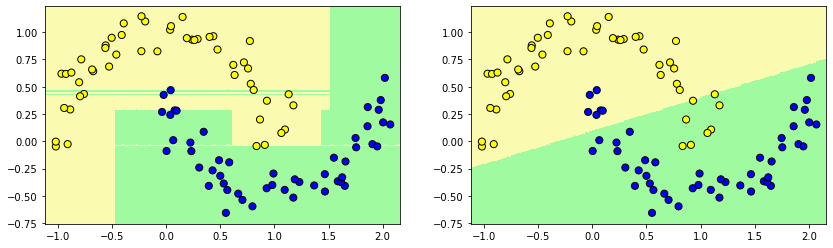

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
plot_classf_model(X, y, tree, ax[0])
plot_classf_model(X, y, svm, ax[1])

plt.savefig("./comparisson.png")